# Group Work Project Machine Learning - 1

#### Contributing Members:
- Shubham Kotal (shubhkotal@gmail.com)
#### Non-Contributing Members:
- Ayooluwa Mayowa Fadahunsi (fadmaa001@gmail.com)
- Batsile Maseng (msnbat004@gmail.com)

## 1. Financial Products
### 1.1 What is an Exchange-Traded Fund (ETF)?  
A Investment fund that replicates an index, a sector, a commodity, or another asset is known as an exchange traded fund.


1.2 Pick 1 of the funds in the data set, and find the weightings.  Show in Python table.  



In [ ]:
import pandas as pd
weightings_shares = pd.read_csv('MSCI_Singapore.csv', index_col=0)
print(weightings_shares)

## 2. Data Importing  
### 2.1 Import the data from the csv file 

In [ ]:
import pandas as pd
# WARNING This file needs to uploaded each runtime.
data = pd.read_csv('MScFE 650 MLF GWP Data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,MSCI EM EU-MIDE-AFRICA,MSCI EM EUROPE,MSCI EM LATIN AMERICA,MSCI FINLAND,MSCI FRANCE,MSCI GERMANY,MSCI HONG KONG,MSCI INDIA,MSCI ITALY,MSCI JAPAN,MSCI KOREA,MSCI MEXICO,MSCI NETHERLANDS,MSCI NEW ZEALAND,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
0,2016-01-01,1390.716,2376.29,3525.9150,1068.79,106.70,105.38,1036.23,1663.27,59.47,8566.71,403.66,210.209,244.42,1829.81,120.63,131.10,140.65,12080.11,987.16,61.26,938.40,526.86,5262.19,120.08,115.77,2373.17,811.96,404.73,1507.8101,1255.75,108.40,11136.65,1148.37,1818.40,1949.70
1,2016-01-08,1291.267,2260.85,3280.6683,1005.56,97.66,99.35,952.01,1586.18,54.63,8183.00,377.65,194.927,231.93,1674.47,115.86,122.85,129.12,11438.23,945.87,56.94,876.35,510.54,4757.80,112.38,113.67,2209.38,751.09,388.05,1437.6600,1177.76,101.00,10389.93,1075.30,1722.00,1831.88
2,2016-01-15,1257.086,2217.50,3118.2981,985.38,93.54,97.32,904.64,1541.08,51.54,7755.73,363.18,181.941,217.90,1625.73,112.37,119.45,125.17,11063.73,927.24,54.86,849.09,500.01,4738.23,110.37,113.92,2095.60,720.23,344.45,1372.9800,1133.72,97.34,10042.32,1056.01,1692.43,1789.56
3,2016-01-22,1254.167,2281.98,2935.0677,985.87,95.79,100.73,879.17,1582.10,51.15,8035.69,363.10,185.011,221.47,1620.67,115.08,123.00,128.08,10654.83,919.19,54.36,833.57,501.70,4769.16,114.75,112.20,2173.55,745.96,367.44,1350.0500,1160.48,99.21,10469.07,1076.48,1719.61,1814.12
4,2016-01-29,1298.240,2462.19,3134.0840,1005.56,96.93,103.05,958.97,1638.84,52.13,8211.17,374.07,201.286,237.29,1744.05,116.55,125.61,128.32,11002.78,941.64,53.16,866.68,508.22,5083.75,117.19,112.43,2214.88,825.18,400.93,1375.1000,1239.58,100.06,10432.42,1087.17,1774.40,1843.88


## 3. 1-Dimensional Data Summaries
### 3.1 Summarize the min, max, mean, median, and standard deviation of each column

In [ ]:
import numpy as np
minimum = np.min(data,axis=0)
maximum = np.max(data,axis=0)
mean = np.mean(data,axis=0)
median = data.median(axis=0)
std = np.std(data,axis=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3370: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """


## 4. Data Visualizing

### 4.1 Write a Python function that graphs 1 time series with appropriate time labels

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


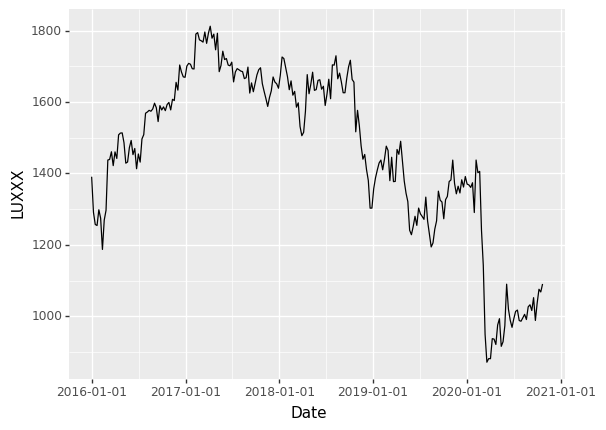

<ggplot: (8750939960381)>

In [ ]:
from plotnine import ggplot, aes, geom_line, geom_point

(ggplot(data=data,
           mapping=aes(x='Date', y='LUXXX', group = 1))
    + geom_line()
)

### 4.2 Write a Python function that graphs 2 time series on the same plot, with labels

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


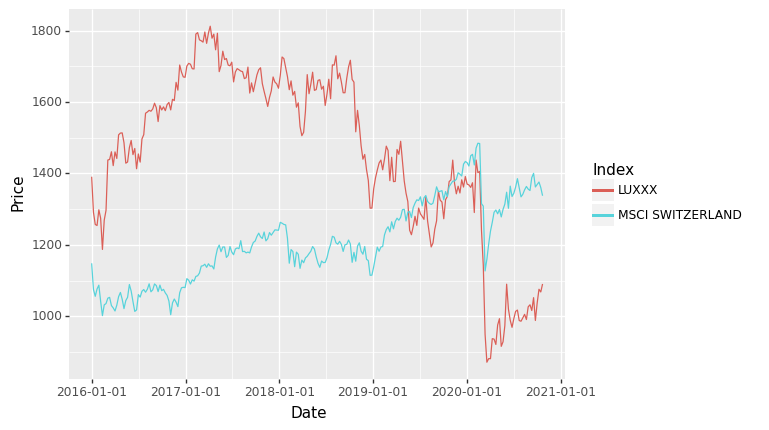

<ggplot: (8750938675485)>


In [ ]:
# I need a new DataFrame. https://stackoverflow.com/questions/61175495/plotnine-doesnt-add-legend
df_melted = pd.melt(data, id_vars=["Date"], var_name = 'Index', value_name='Price', value_vars=["LUXXX", "MSCI SWITZERLAND"])
print(ggplot(data=df_melted,
           mapping=aes(x='Date', y='Price'))
    + geom_line(aes(color='Index'))
)

### 4.3 Write a Python function that compares the 2 return series

In [ ]:
LUXXX_returns = data['LUXXX'].pct_change() * 100
MSCI_Switzerland_returns = data['MSCI SWITZERLAND'].pct_change() * 100
returns = pd.concat([data['Date'],LUXXX_returns, MSCI_Switzerland_returns], axis=1).dropna()
returns.columns = ['Date','LUXXX','MSCI SWITZERLAND']

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


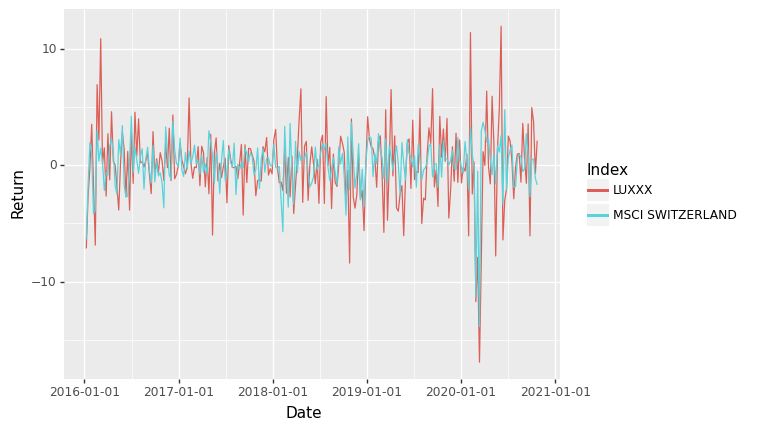

<ggplot: (8750938330169)>


In [ ]:
df_returns = pd.melt(returns, id_vars=['Date'], var_name = 'Index', value_name='Return', value_vars=["LUXXX", "MSCI SWITZERLAND"])

print(ggplot(data=df_returns,
           mapping=aes(x='Date', y='Return'))
    + geom_line(aes(color='Index'))
)


## 5. 2-Dimensional Data Summary

### 5.1 Compute the correlation using Pearson correlation

In [ ]:
data_returns = data.drop(['Date'], axis=1).pct_change().dropna()

In [ ]:
rho = data_returns.corr(method="pearson")
rho

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,MSCI EM EU-MIDE-AFRICA,MSCI EM EUROPE,MSCI EM LATIN AMERICA,MSCI FINLAND,MSCI FRANCE,MSCI GERMANY,MSCI HONG KONG,MSCI INDIA,MSCI ITALY,MSCI JAPAN,MSCI KOREA,MSCI MEXICO,MSCI NETHERLANDS,MSCI NEW ZEALAND,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
LUXXX,1.000000,0.352519,0.396378,0.537563,0.728516,0.629249,0.518843,0.649379,0.552318,0.426387,0.626610,0.604599,0.595857,0.586454,0.612131,0.715854,0.698170,0.561525,0.529224,0.625024,0.567393,0.597037,0.556822,0.647320,0.283566,0.592922,0.536403,0.512421,0.646598,0.527530,0.697541,0.660605,0.529931,0.629050,0.616544
MSCI ARGENTINA,0.352519,1.000000,0.298794,0.358872,0.346262,0.299962,0.460622,0.497451,0.379221,0.319103,0.430457,0.437337,0.422698,0.509154,0.348407,0.382591,0.402988,0.329540,0.359007,0.308604,0.319113,0.401422,0.397464,0.390988,0.266620,0.269184,0.428820,0.359402,0.404511,0.399387,0.368915,0.330125,0.295562,0.415606,0.494970
BLP ORIENTE MEDIO,0.396378,0.298794,1.000000,0.322388,0.391025,0.350167,0.363949,0.439619,0.319993,0.267502,0.408770,0.429615,0.411303,0.398547,0.399498,0.428492,0.423307,0.332242,0.460961,0.317109,0.341770,0.405532,0.345052,0.370663,0.174997,0.332223,0.368643,0.330736,0.436964,0.352671,0.367416,0.349182,0.338331,0.369625,0.356788
MSCI AUSTRALIA,0.537563,0.358872,0.322388,1.000000,0.575245,0.525681,0.456797,0.733377,0.417886,0.486239,0.519677,0.542395,0.582329,0.522401,0.536674,0.586212,0.611289,0.486682,0.508768,0.515210,0.553564,0.577826,0.514978,0.576392,0.502592,0.539245,0.468253,0.528570,0.603945,0.503409,0.559584,0.566761,0.533601,0.597897,0.646677
MSCI AUSTRIA,0.728516,0.346262,0.391025,0.575245,1.000000,0.735437,0.528381,0.695116,0.534530,0.438565,0.609936,0.671998,0.713539,0.601013,0.694865,0.830545,0.810033,0.564345,0.538961,0.799365,0.676178,0.609886,0.564993,0.738502,0.263594,0.702697,0.539345,0.631672,0.674701,0.571683,0.823351,0.762099,0.635450,0.722635,0.639047
MSCI BELGIUM,0.629249,0.299962,0.350167,0.525681,0.735437,1.000000,0.453806,0.631152,0.483334,0.570944,0.572317,0.585431,0.616108,0.528110,0.743968,0.822903,0.812314,0.489937,0.545565,0.744669,0.588629,0.582823,0.518049,0.811690,0.348590,0.694434,0.472105,0.536334,0.557208,0.532921,0.777471,0.753090,0.746223,0.744212,0.592950
MSCI BRAZIL,0.518843,0.460622,0.363949,0.456797,0.528381,0.453806,1.000000,0.556798,0.445705,0.281952,0.563339,0.673537,0.631496,0.967333,0.406014,0.532918,0.523038,0.500694,0.546722,0.466920,0.398420,0.520773,0.645819,0.444964,0.168210,0.406108,0.649115,0.528420,0.598892,0.518705,0.538038,0.454140,0.344315,0.502063,0.539819
MSCI CANADA,0.649379,0.497451,0.439619,0.733377,0.695116,0.631152,0.556798,1.000000,0.572605,0.613478,0.664483,0.667246,0.672047,0.644644,0.667403,0.772112,0.781566,0.563288,0.601005,0.659406,0.643149,0.716705,0.616453,0.766243,0.462374,0.603580,0.572423,0.609439,0.679977,0.693885,0.698741,0.747977,0.662840,0.756708,0.870667
MSCI CHINA,0.552318,0.379221,0.319993,0.417886,0.534530,0.483334,0.445705,0.572605,1.000000,0.438034,0.932611,0.664849,0.555441,0.522157,0.518885,0.578218,0.588814,0.817956,0.531544,0.479601,0.550308,0.681962,0.502792,0.594292,0.316807,0.456581,0.494594,0.479575,0.678273,0.657842,0.524948,0.571177,0.509701,0.509929,0.611247
MSCI DENMARK,0.426387,0.319103,0.267502,0.486239,0.438565,0.570944,0.281952,0.613478,0.438034,1.000000,0.475832,0.504259,0.496546,0.343301,0.620639,0.620263,0.635260,0.373943,0.401379,0.546522,0.530100,0.475909,0.365395,0.691843,0.426656,0.568824,0.288216,0.466349,0.410720,0.505551,0.546181,0.629679,0.751465,0.636565,0.559718


### 5.2 Recompute the calculation, instead of using Spearman correlation

In [ ]:
from scipy import stats
rho_spearman = data_returns.corr(method="spearman")
rho_spearman

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,MSCI EM EU-MIDE-AFRICA,MSCI EM EUROPE,MSCI EM LATIN AMERICA,MSCI FINLAND,MSCI FRANCE,MSCI GERMANY,MSCI HONG KONG,MSCI INDIA,MSCI ITALY,MSCI JAPAN,MSCI KOREA,MSCI MEXICO,MSCI NETHERLANDS,MSCI NEW ZEALAND,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
LUXXX,1.000000,0.312498,0.315201,0.353280,0.612464,0.475425,0.390527,0.537303,0.505948,0.292527,0.536808,0.482633,0.492517,0.452905,0.478049,0.601077,0.593024,0.470833,0.369573,0.500940,0.495557,0.457743,0.413931,0.506527,0.148722,0.475606,0.438072,0.411331,0.542700,0.367467,0.578545,0.526772,0.405362,0.522850,0.564973
MSCI ARGENTINA,0.312498,1.000000,0.216588,0.164709,0.294162,0.305402,0.417629,0.396902,0.377742,0.291778,0.393289,0.317936,0.298168,0.442521,0.306924,0.384802,0.378738,0.298123,0.300206,0.296455,0.252585,0.313349,0.324307,0.401693,0.128624,0.270854,0.321400,0.256696,0.311158,0.272479,0.373528,0.317780,0.266326,0.370901,0.407744
BLP ORIENTE MEDIO,0.315201,0.216588,1.000000,0.168662,0.278989,0.244226,0.298229,0.262159,0.284349,0.198642,0.341160,0.347363,0.325517,0.305354,0.308876,0.324580,0.309654,0.254309,0.311901,0.218016,0.300849,0.338723,0.217702,0.285334,-0.017901,0.292975,0.279951,0.292474,0.331351,0.235655,0.251515,0.270533,0.260500,0.245378,0.273664
MSCI AUSTRALIA,0.353280,0.164709,0.168662,1.000000,0.401227,0.390402,0.208918,0.532015,0.291388,0.355727,0.315734,0.343980,0.402384,0.256374,0.428457,0.439036,0.463927,0.311795,0.266351,0.368531,0.483792,0.373394,0.304513,0.421282,0.389977,0.423180,0.212628,0.378776,0.452590,0.268146,0.405289,0.398656,0.426847,0.429484,0.452219
MSCI AUSTRIA,0.612464,0.294162,0.278989,0.401227,1.000000,0.605672,0.406094,0.588276,0.505468,0.314440,0.523526,0.539780,0.598321,0.475004,0.558573,0.727585,0.691836,0.470589,0.354339,0.710861,0.615662,0.494821,0.461801,0.621182,0.103202,0.625518,0.411486,0.526410,0.559164,0.433934,0.731031,0.633985,0.486889,0.570079,0.558047
MSCI BELGIUM,0.475425,0.305402,0.244226,0.390402,0.605672,1.000000,0.354834,0.562699,0.432722,0.429543,0.482850,0.457896,0.441360,0.419207,0.625272,0.720609,0.713235,0.417072,0.415124,0.626271,0.481416,0.464010,0.398329,0.720597,0.132760,0.568066,0.367185,0.379624,0.433625,0.404499,0.667089,0.624835,0.622725,0.574149,0.540691
MSCI BRAZIL,0.390527,0.417629,0.298229,0.208918,0.406094,0.354834,1.000000,0.367158,0.406660,0.188993,0.466183,0.585913,0.545067,0.958774,0.293437,0.384071,0.371201,0.416983,0.355042,0.335786,0.284536,0.384443,0.487509,0.323244,0.012613,0.327480,0.528151,0.436902,0.399788,0.364513,0.396343,0.356483,0.281579,0.389230,0.407868
MSCI CANADA,0.537303,0.396902,0.262159,0.532015,0.588276,0.562699,0.367158,1.000000,0.515051,0.522908,0.508089,0.458166,0.463517,0.432190,0.596099,0.713751,0.681027,0.440134,0.369323,0.575263,0.592747,0.512340,0.424068,0.697541,0.299125,0.597512,0.393704,0.441720,0.494124,0.470532,0.618352,0.682969,0.616936,0.621324,0.750948
MSCI CHINA,0.505948,0.377742,0.284349,0.291388,0.505468,0.432722,0.406660,0.515051,1.000000,0.327506,0.934164,0.631398,0.522994,0.490267,0.484310,0.508252,0.529027,0.800612,0.488725,0.424296,0.472138,0.650112,0.450057,0.526107,0.206790,0.407517,0.427553,0.427216,0.634698,0.616137,0.478602,0.509509,0.413852,0.451817,0.597740
MSCI DENMARK,0.292527,0.291778,0.198642,0.355727,0.314440,0.429543,0.188993,0.522908,0.327506,1.000000,0.326963,0.319158,0.302068,0.223654,0.486628,0.523555,0.528215,0.296297,0.277132,0.406373,0.429040,0.337194,0.241478,0.552948,0.224508,0.394437,0.163334,0.274544,0.301141,0.354001,0.425220,0.536294,0.637063,0.492990,0.506639


### 5.3 Recompute the calculation, instead of using Kendall correlation

In [ ]:
tau = data_returns.corr(method="kendall")
tau

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,MSCI EM EU-MIDE-AFRICA,MSCI EM EUROPE,MSCI EM LATIN AMERICA,MSCI FINLAND,MSCI FRANCE,MSCI GERMANY,MSCI HONG KONG,MSCI INDIA,MSCI ITALY,MSCI JAPAN,MSCI KOREA,MSCI MEXICO,MSCI NETHERLANDS,MSCI NEW ZEALAND,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
LUXXX,1.000000,0.212048,0.219988,0.244749,0.442805,0.341705,0.273116,0.382183,0.355219,0.199363,0.380845,0.336542,0.342151,0.318884,0.336733,0.434008,0.426869,0.331633,0.259410,0.352414,0.345504,0.323857,0.290837,0.361402,0.097434,0.340303,0.308749,0.284080,0.384159,0.252526,0.414693,0.377976,0.281657,0.371347,0.401625
MSCI ARGENTINA,0.212048,1.000000,0.149357,0.112606,0.200382,0.211474,0.292558,0.274773,0.260430,0.200956,0.274327,0.217657,0.204908,0.308239,0.209179,0.262088,0.262343,0.205992,0.208096,0.204462,0.169947,0.212876,0.227283,0.272988,0.084622,0.185339,0.220590,0.175139,0.214024,0.182598,0.250422,0.217785,0.182279,0.252335,0.282741
BLP ORIENTE MEDIO,0.219988,0.149357,1.000000,0.117548,0.192322,0.173453,0.209533,0.184354,0.193915,0.135397,0.237518,0.245868,0.228530,0.215270,0.216545,0.227892,0.212338,0.172943,0.212784,0.149994,0.206572,0.233502,0.149867,0.199780,-0.014980,0.207748,0.192959,0.208195,0.231781,0.158600,0.172497,0.190919,0.178425,0.164847,0.195637
MSCI AUSTRALIA,0.244749,0.112606,0.117548,1.000000,0.280382,0.280000,0.144351,0.378359,0.198406,0.246661,0.220080,0.237482,0.280701,0.181195,0.301163,0.310598,0.329211,0.216765,0.185466,0.254884,0.348181,0.262279,0.210390,0.296255,0.272988,0.299251,0.144542,0.263936,0.323347,0.184701,0.282359,0.276494,0.300526,0.299952,0.319012
MSCI AUSTRIA,0.442805,0.200382,0.192322,0.280382,1.000000,0.444016,0.289880,0.426486,0.352606,0.217275,0.371857,0.383777,0.432733,0.341386,0.408446,0.543713,0.514135,0.332717,0.249402,0.523697,0.446159,0.354008,0.332080,0.448287,0.071745,0.463012,0.291474,0.369179,0.394805,0.299888,0.550279,0.467155,0.344701,0.403028,0.401689
MSCI BELGIUM,0.341705,0.211474,0.173453,0.280000,0.444016,1.000000,0.245131,0.402135,0.298550,0.296064,0.342534,0.318375,0.307793,0.292940,0.457147,0.542311,0.539378,0.291538,0.298231,0.452558,0.341488,0.333610,0.279554,0.533195,0.085004,0.405386,0.259219,0.261705,0.310406,0.278980,0.488319,0.462056,0.454725,0.416669,0.393020
MSCI BRAZIL,0.273116,0.292558,0.209533,0.144351,0.289880,0.245131,1.000000,0.257817,0.281849,0.127904,0.333992,0.424956,0.392574,0.830821,0.204717,0.271267,0.257880,0.292813,0.251315,0.235570,0.195828,0.267442,0.348781,0.223267,0.008127,0.228685,0.385434,0.314741,0.282869,0.254247,0.275920,0.248000,0.195538,0.270311,0.289625
MSCI CANADA,0.382183,0.274773,0.184354,0.378359,0.426486,0.402135,0.257817,1.000000,0.365163,0.368414,0.361849,0.320733,0.327108,0.304351,0.429801,0.531410,0.502343,0.311108,0.263363,0.414120,0.430349,0.362104,0.300526,0.514263,0.205801,0.437960,0.279171,0.311490,0.353179,0.330805,0.453705,0.503044,0.444207,0.454853,0.570167
MSCI CHINA,0.355219,0.260430,0.193915,0.198406,0.352606,0.298550,0.281849,0.365163,1.000000,0.223777,0.780845,0.458359,0.372048,0.342279,0.341896,0.358470,0.375936,0.614470,0.346167,0.297402,0.333902,0.471554,0.317036,0.373323,0.139442,0.283124,0.300016,0.300207,0.459060,0.444717,0.339028,0.363506,0.290390,0.319649,0.434327
MSCI DENMARK,0.199363,0.200956,0.135397,0.246661,0.217275,0.296064,0.127904,0.368414,0.223777,1.000000,0.222757,0.219633,0.204590,0.152382,0.345147,0.377912,0.377912,0.204016,0.191841,0.284590,0.302411,0.235251,0.163474,0.393657,0.155187,0.278980,0.111777,0.187952,0.207841,0.246916,0.302629,0.382821,0.466263,0.346231,0.359809


## 6. Data Selection  
### 6.1 Choose one of the 35 variables to serve as your response variable (e.g. LUXXX)  
We choose **MSCI SWITZERLAND** as our response variable.

## 7. Principal Component Analysis

### 7.1 Use the Pearson correlation matrix  

In [ ]:
from sklearn.decomposition import PCA

df = data.corr(method = 'pearson')
pca = PCA(n_components=35)
pca.fit(df)
X1=pca.fit_transform(df)
print(X1)

[[ 3.00487189e+00  9.09864173e-01 -1.48145946e-02 ... -3.00206451e-05
   8.54015610e-07  7.62710652e-16]
 [ 2.85679301e+00  1.25219635e+00  4.42488113e-01 ... -3.41298638e-07
  -1.16064224e-05  7.62710652e-16]
 [ 3.37870779e+00  2.06666451e+00 -1.70929083e-01 ...  4.14913563e-05
   5.88541556e-06  7.62710652e-16]
 ...
 [-2.24742452e+00  9.76111915e-01 -2.20634049e-01 ...  4.38009846e-05
   5.55688453e-06  7.62710652e-16]
 [ 1.46170497e+00 -7.42931104e-01 -2.38407096e-01 ... -1.12088537e-05
  -7.88492401e-06  7.62710652e-16]
 [-2.40786254e+00  9.31961304e-01 -5.74901063e-02 ... -1.29147660e-06
   1.95915581e-06  7.62710652e-16]]


### 7.2 Show the amount of variation explained by the first 5 components  

In [ ]:
pca = PCA(n_components= 5)
pca.fit(df)
X1=pca.fit_transform(df)
print(pca.explained_variance_ratio_) 

[0.69253938 0.27402058 0.01896082 0.00756513 0.00331996]


### 7.3 How many components are needed to express 80% of the variation of the data?  

In [ ]:
pca_80 = PCA(n_components = 0.80, random_state = 2021)
pca_80.fit(df)
X2=pca.fit_transform(df)
print(X2.shape)
print('This shows that 80% of the variation is needed')

(35, 5)
This shows that 80% of the variation is needed


### 7.4 What is your interpretation of the 1st component?

The first component captures 69.25% of the varaibility in data

### 8.1 What do these 2 methodologies have in common?  
Both PCA and lasso are dimensionality reduction technique

### 8.2 How do these 2 methodologies differ?
The main difference is that Lasso is a regularization technique (adding vars to minimize effect of large coefficients) while PCA is feature selection technique (by covariance matrix decomposition).

## 9. PCA Regression and LASSO Regression  
### 9.1 Run a regression of Y versus the PCA scores

In [ ]:
# Calculate the PCA scores
pca = PCA(n_components=2)
pca_plot = pca.fit_transform(data_returns)

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
# Run the regression of Y vs. the PCA scores
lr_pca = LinearRegression()
y_predicted = lr_pca.fit(pca_plot,data_returns['MSCI SWITZERLAND']).predict(pca_plot)

In [ ]:
from sklearn.metrics import r2_score


In [ ]:
PCA_r2 = r2_score(y_predicted, data_returns['MSCI SWITZERLAND'])
PCA_r2

0.5979770931020422

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

train, test = train_test_split(data_returns, test_size=1/3)

feature_cols = [x for x in train.columns if x != 'MSCI SWITZERLAND']
X_train = train[feature_cols]
y_train = train['MSCI SWITZERLAND']

X_test  = test[feature_cols]
y_test  = test['MSCI SWITZERLAND']

lr = LinearRegression()
X = data_returns.drop('MSCI SWITZERLAND', axis=1)

y = data_returns['MSCI SWITZERLAND']

X_train = train[feature_cols]
y_train = train['MSCI SWITZERLAND']

X_test  = test[feature_cols]
y_test  = test['MSCI SWITZERLAND']

pipe = [
    ('pca', PCA(n_components=2)),
    ('regression', lr)
]
pipe = Pipeline(pipe)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

PCA_r2 = r2_score(y_pred, y_test)
PCA_r2

0.3635551689412412

In [ ]:
y_pred_df = pd.Series(y_pred)
y_pred_df.index = y_test.index
lr_df = pd.concat([y_pred_df,y_test],axis=1)
lr_df.columns = ['y_pred','y_test']

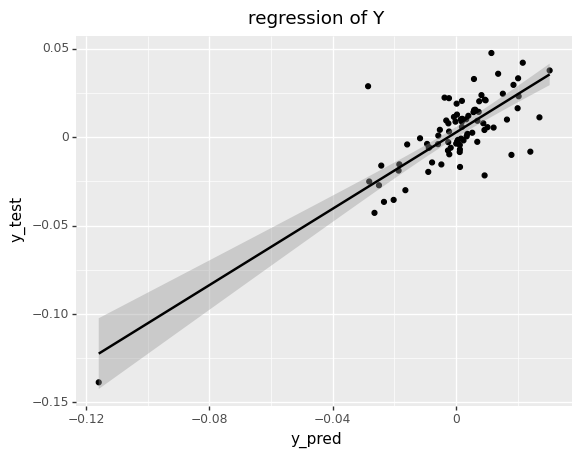

{<ggplot: (8750925593041)>}

In [ ]:
from plotnine import geom_smooth, ggtitle
{
    ggplot(lr_df,aes(x='y_pred',y='y_test')) + geom_point() + geom_smooth(method='lm')
    + ggtitle('regression of Y')
}

## 10. LASSO Regression

### 10.1 Run a linear regression of Y versus the other predictors  

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
yhat = reg.predict(X_test)

lr_r2_score = r2_score(yhat, y_test)
lr_r2_score

0.8333625677348829

### 10.2 For the LASSO, use at least 1000 different values of the penalty parameter
### 10.3 Split the data into testing and training, with 2/3 for training and 1/3 for testing  
### 10.4 Graph the overall model mismatch for each of the 1000 values of the paramter  
### 10.5 Find a LASSO model that includes no more than 7 predictors

In [ ]:
from sklearn.model_selection import RepeatedKFold, GridSearchCV

model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.linspace(1e-4, 1, num=1000)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.008
Config: {'alpha': 0.0001}


In [ ]:
lasso_r2_score = r2_score(results.predict(X_test), y_test)
lasso_r2_score

0.19794475415800306